- Topic: Random Forest Regression 
- Unit: ADS1002
- Level: Beginner
- Author: Ashish Dutt
- Version: 0.0.1

### Random Forest Regression

Random Forest Regression is a machine learning algorithm used for predicting continuous values, like the price of a house. It's based on the idea of building **multiple decision trees** and combining their results to make better predictions. The algorithm is part of the **ensemble learning category**, meaning it uses a combination of several models to make more accurate predictions.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

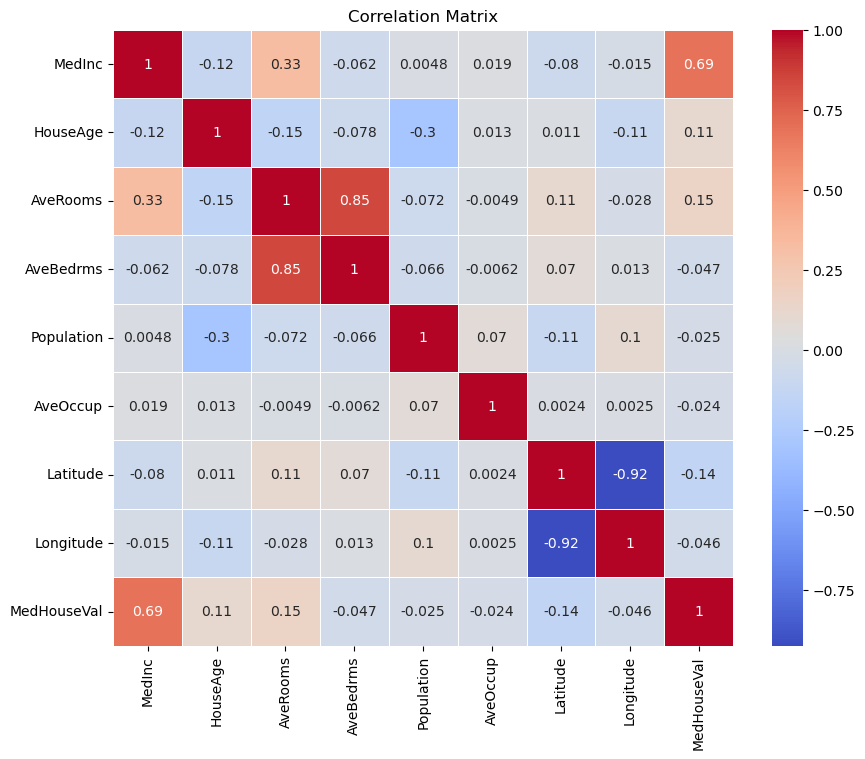

Mean Squared Error (MSE): 0.2553684927247781
Root Mean Squared Error (RMSE): 0.5053399773665033
R-squared (R2): 0.8051230593157366


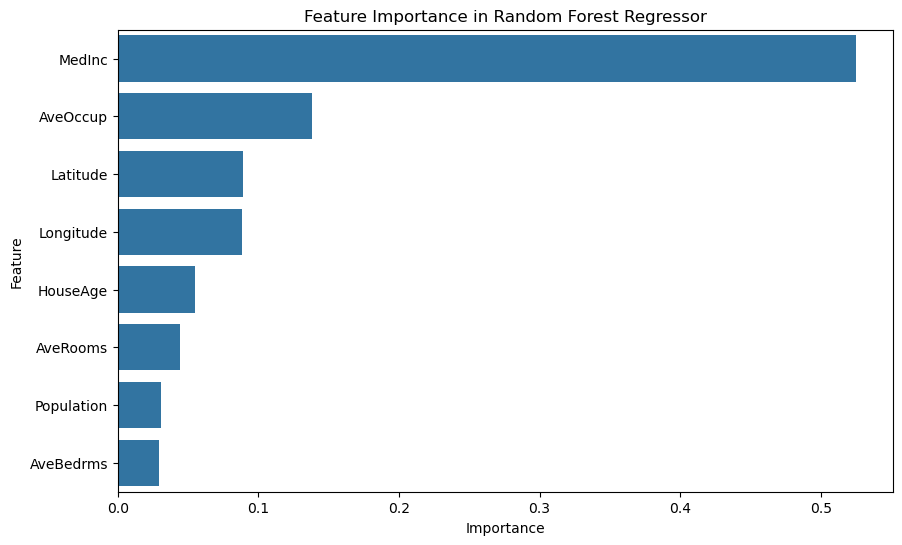

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target  # Add target column to dataframe

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values (California housing dataset doesn't have missing values)
print(df.isnull().sum())

# Visualize the correlation matrix to see how features are correlated
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Split data into features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)  # All features
y = df['MedHouseVal']  # Target variable (Median house value)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Regressor')
plt.show()


### Code Explanation:

1. **Data Loading**:

- We fetch the California Housing dataset using fetch_california_housing().
- We convert the data into a pandas DataFrame for easier handling.

2. **Exploratory Data Analysis (EDA)**:

- We check the dataset for any missing values and examine the correlation between features using a heatmap.

3. **Data Splitting**:

- The dataset is split into training (80%) and testing (20%) sets using train_test_split().

4. **Model Training**:

- A Random Forest Regressor is initialized and trained on the training set.

5. **Model Evaluation**:

- The model's predictions are evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) value.

6. **Feature Importance**:

- The feature importances are plotted to show which features contribute the most to the model’s predictions.

#### Output:

- Evaluation metrics: MSE, RMSE, and R².
- Feature importance plot showing the importance of each feature in the dataset.

This script will help you understand how Random Forest Regression works and how to analyze its performance on the California Housing dataset.